In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [4]:
df=pd.read_excel('/content/sample_data/Airbnb_Open_Data.xlsx')

In [5]:
df.head()


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [7]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [8]:
#Neighbourhood group was 'brookln' instead of 'Brooklyn'
df[df['neighbourhood group']=='brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,116.0,4.0,167.0,2019-06-24,1.34,4.0,3.0,47.0,NaN,NaN


In [9]:
#Drop duplicate records
df.drop_duplicates(inplace=True)



In [10]:
# Drop house_rules and license columns only if they exist
df.drop(['house_rules', 'license'], axis=1, inplace=True, errors='ignore')

# Ensure price and service fee are strings, then clean $ and ,
if 'price' in df.columns:
    df['price'] = df['price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
if 'service fee' in df.columns:
    df['service fee'] = df['service fee'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)

# Rename the price and service fee columns
df.rename(columns={
    'price': 'price_$',
    'service fee': 'service_fee_$'
}, inplace=True)

# Correct spelling of 'brookln' → 'Brooklyn'
if 'neighbourhood_group' in df.columns:
    df.loc[df['neighbourhood_group'] == 'brookln', 'neighbourhood_group'] = 'Brooklyn'

# Remove outliers in availability_365 (> 500)
if 'availability_365' in df.columns:
    df = df.drop(df[df['availability_365'] > 500].index)

# Drop rows with missing values
df.dropna(inplace=True)

# Convert to correct datatypes (only if columns exist)
if 'price_$' in df.columns:
    df['price_$'] = df['price_$'].astype(float)
if 'service_fee_$' in df.columns:
    df['service_fee_$'] = df['service_fee_$'].astype(float)
if 'id' in df.columns:
    df['id'] = df['id'].astype(str)
if 'host id' in df.columns:
    df['host id'] = df['host id'].astype(str)
if 'last review' in df.columns:
    df['last review'] = pd.to_datetime(df['last review'])
if 'Construction year' in df.columns:
    df['Construction year'] = df['Construction year'].astype(int)


In [11]:
df.duplicated().value_counts()

,count
False,83797


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83797 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83797 non-null  object        
 1   NAME                            83797 non-null  object        
 2   host id                         83797 non-null  object        
 3   host_identity_verified          83797 non-null  object        
 4   host name                       83797 non-null  object        
 5   neighbourhood group             83797 non-null  object        
 6   neighbourhood                   83797 non-null  object        
 7   lat                             83797 non-null  float64       
 8   long                            83797 non-null  float64       
 9   country                         83797 non-null  object        
 10  country code                    83797 non-null  object        
 11  instan

In [13]:
df.describe()

,lat,long,instant_bookable,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83797.000000,83797.000000,83797.000000,83797.000000,83597.000000,83568.000000,83797.000000,83797.000000,83797,83797.000000,83797.000000,83797.000000,83797.000000
mean,40.727355,-73.948502,0.497727,2012.489481,626.349151,125.233774,7.436722,32.229006,2019-06-09 15:15:56.697733888,1.375618,3.278841,7.049835,141.801341
min,40.504560,-74.249840,0.000000,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687660,-73.982110,0.000000,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-27 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721340,-73.953710,0.000000,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762580,-73.930790,1.000000,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,0.056317,0.050338,0.499998,5.760501,331.813050,66.358543,28.122748,51.902177,NaN,1.749447,1.283730,29.568531,133.965307


In [14]:
#What are The different property types in the dataset?
property_types=df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,44368
Private room,37664
Shared room,1655
Hotel room,110


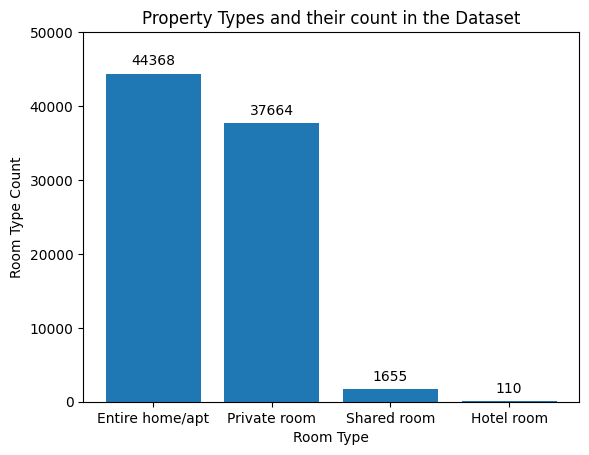

In [15]:
# Assuming property_types is a DataFrame with index as categories and a "count" column
room_type_bar = plt.bar(property_types.index, property_types["count"])

# Add labels above bars
plt.bar_label(room_type_bar, labels=property_types["count"], padding=4)

# Formatting
plt.ylim([0, 50000])
plt.xlabel("Room Type")
plt.ylabel("Room Type Count")
plt.title("Property Types and their count in the Dataset")

plt.show()

In [16]:
hood_group=df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34779
Manhattan,34736
Queens,11184
Bronx,2276
Staten Island,821
brookln,1


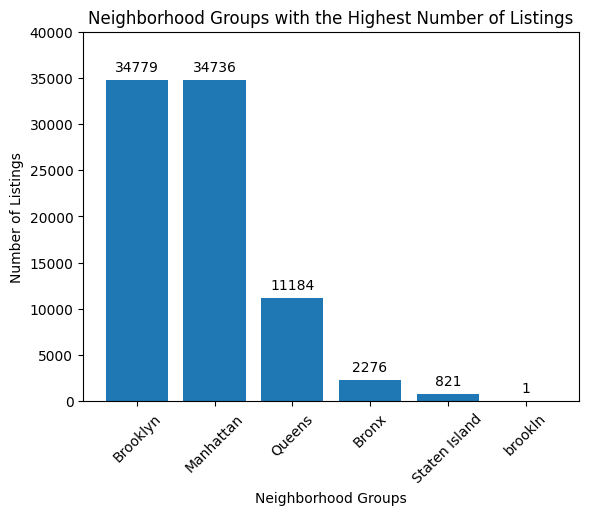

In [17]:
# Assuming hood_group is a DataFrame with index as neighborhood groups and a "count" column
hood_group_bar = plt.bar(hood_group.index, hood_group["count"])

# Add labels above bars
plt.bar_label(hood_group_bar, labels=hood_group["count"], padding=4)

# Formatting
plt.ylim([0, 40000])
plt.xlabel("Neighborhood Groups")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45)
plt.title("Neighborhood Groups with the Highest Number of Listings")

plt.show()

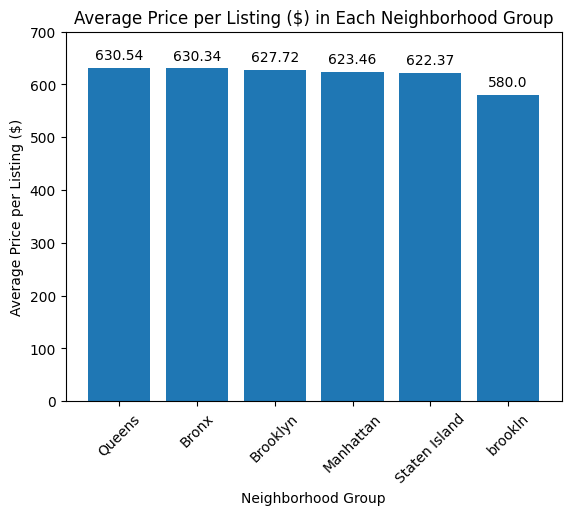

In [18]:
# Group by neighborhood group and calculate average price
avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False)

# Create bar plot
avg_price_bar = plt.bar(avg_price.index, avg_price.values)

# Add labels above bars (rounded to 2 decimals)
plt.bar_label(avg_price_bar, labels=avg_price.round(2), label_type='edge', padding=4)

# Formatting
plt.ylim([0, 700])
plt.xlabel("Neighborhood Group")
plt.ylabel("Average Price per Listing ($)")
plt.xticks(rotation=45)
plt.title("Average Price per Listing ($) in Each Neighborhood Group")

plt.show()


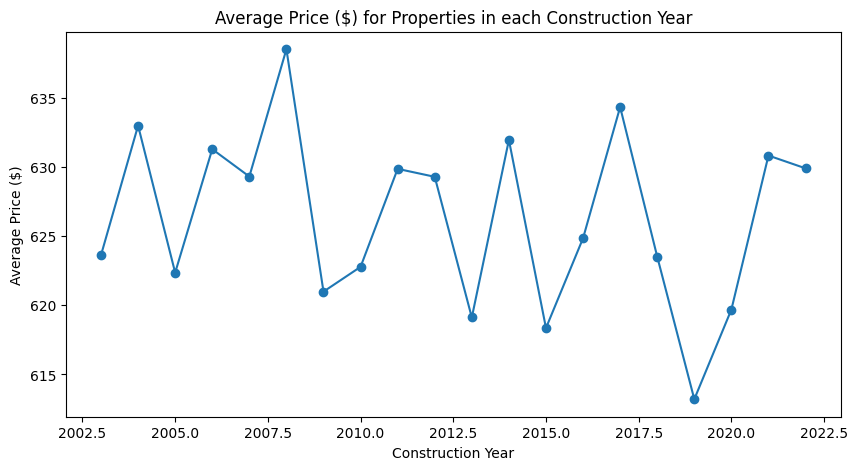

In [19]:
# Group by construction year and calculate average price
avg_price_by_year = df.groupby('Construction year')['price_$'].mean()

# Plot as a line chart (trend)
avg_price_by_year.plot(figsize=(10,5), marker='o')
plt.xlabel('Construction Year')
plt.ylabel('Average Price ($)')
plt.title('Average Price ($) for Properties in each Construction Year')
plt.show()


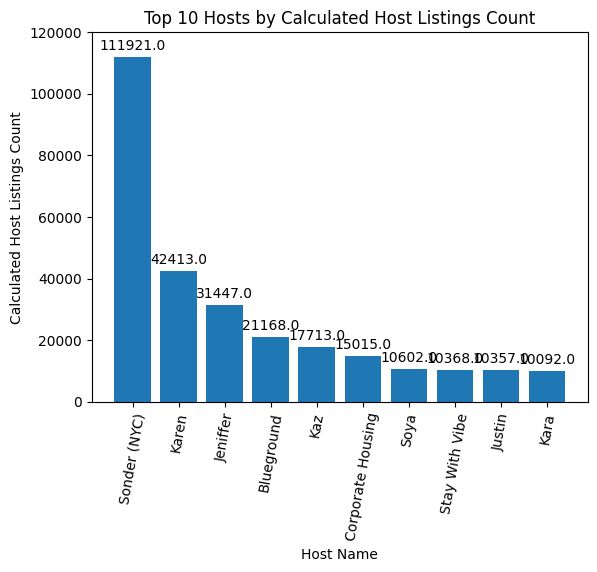

In [20]:
# Top 10 hosts by calculated host listings count
hosts = (
    df.groupby('host name')['calculated host listings count']
    .sum()
    .sort_values(ascending=False)
    .nlargest(10)
    .to_frame()
)

# Plot
hosts_bar = plt.bar(hosts.index, hosts['calculated host listings count'])
plt.bar_label(hosts_bar, labels=hosts['calculated host listings count'], label_type='edge', padding=3)
plt.xlabel('Host Name')
plt.ylabel('Calculated Host Listings Count')
plt.xticks(rotation=80)
plt.ylim([0, 120000])
plt.title('Top 10 Hosts by Calculated Host Listings Count')
plt.show()


In [21]:
# Group by host identity verification and calculate average review rating
review = (
    df.groupby('host_identity_verified')['review rate number']
    .mean()
    .sort_values(ascending=False)
    .to_frame()
)

print(review)


                        review rate number
host_identity_verified                    
verified                          3.283897
unconfirmed                       3.273786


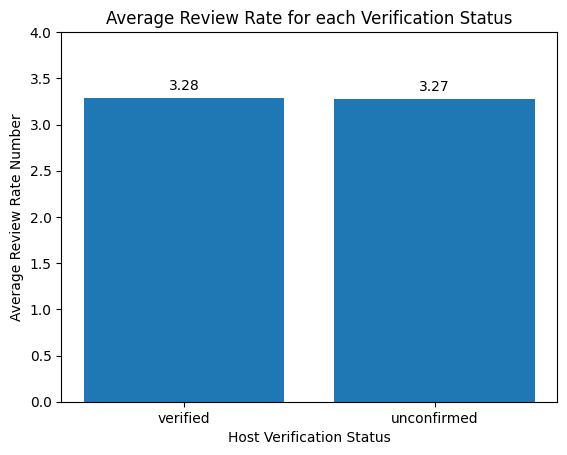

In [22]:
# Bar plot for average review rates by host identity verification
review_bar = plt.bar(review.index, review.loc[:, "review rate number"])

# Add labels on top of bars (rounded to 2 decimals)
plt.bar_label(review_bar, labels=round(review.loc[:, "review rate number"], 2), padding=4)

# Formatting
plt.ylim([0, 4])
plt.xlabel('Host Verification Status')
plt.ylabel('Average Review Rate Number')
plt.title('Average Review Rate for each Verification Status')

plt.show()



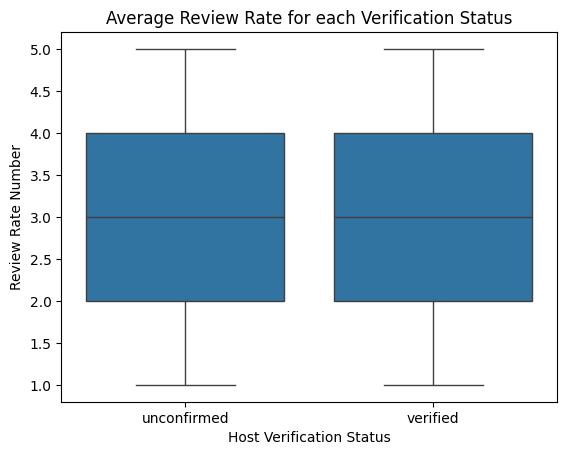

In [23]:


# Pick a base color from the Seaborn color palette
base_color = sns.color_palette()[0]  # using the first color

# Boxplot
sns.boxplot(data=df, x="host_identity_verified", y="review rate number", color=base_color)

# Labels and title
plt.xlabel('Host Verification Status')
plt.ylabel('Review Rate Number')
plt.title('Average Review Rate for each Verification Status')

plt.show()


In [24]:
#Is there a correlation between the price of a listing and its service fee?
df['price_$'].corr(df['service_fee_$'])

np.float64(0.9999909085489923)

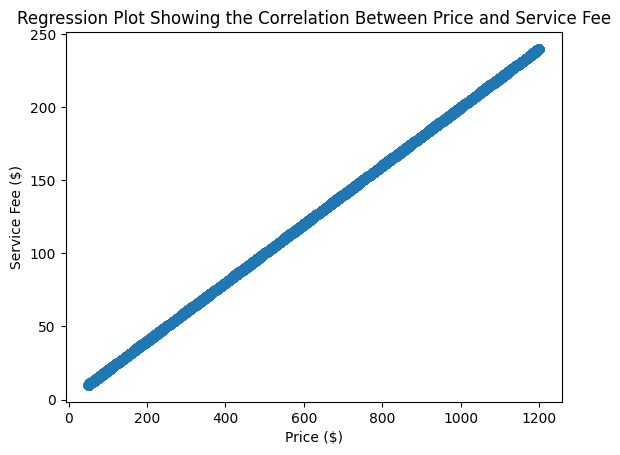

In [25]:
sns.regplot(data=df, x='price_$', y='service_fee_$')

plt.xlabel('Price ($)')
plt.ylabel('Service Fee ($)')
plt.title('Regression Plot Showing the Correlation Between Price and Service Fee')
plt.show()

In [26]:
# Average review rate number by neighborhood group and room type
ARRN = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame(name='avg_review_rate')
print(ARRN)


                                     avg_review_rate
neighbourhood group room type                       
Bronx               Entire home/apt         3.379863
                    Private room            3.312548
                    Shared room             3.356322
Brooklyn            Entire home/apt         3.243013
                    Hotel room              3.833333
                    Private room            3.274729
                    Shared room             3.322368
Manhattan           Entire home/apt         3.269024
                    Hotel room              3.500000
                    Private room            3.285628
                    Shared room             3.252976
Queens              Entire home/apt         3.347437
                    Hotel room              3.750000
                    Private room            3.311761
                    Shared room             3.327402
Staten Island       Entire home/apt         3.334129
                    Private room            3.

/tmp/ipython-input-924932975.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


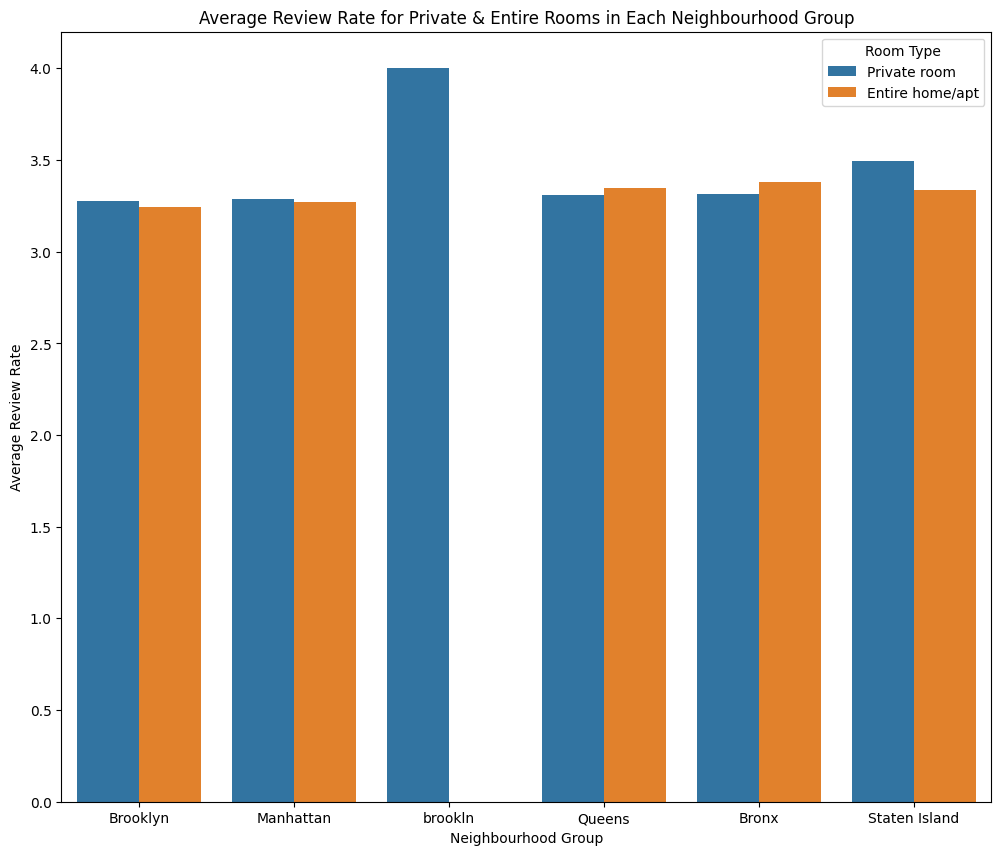

In [27]:
# Filter dataset to keep only Private room and Entire home/apt
filtered_df = df[df['room type'].isin(['Private room', 'Entire home/apt'])]

plt.figure(figsize=(12,10))
sns.barplot(
    data=filtered_df,
    x='neighbourhood group',
    y='review rate number',
    hue='room type',
    ci=None  # optional: show mean only
)

plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Review Rate')
plt.title('Average Review Rate for Private & Entire Rooms in Each Neighbourhood Group')
plt.legend(title='Room Type')
plt.show()

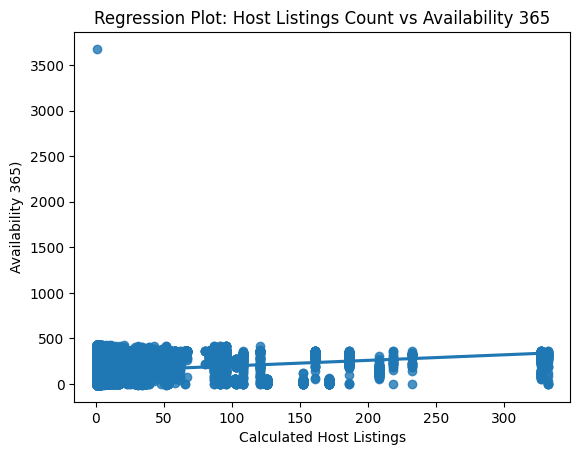

In [28]:
# Are hosts with a higher calculated host listings count more likely to maiintain higher availabilty throughout the year?
sns.regplot(df, x='calculated host listings count', y='availability 365')


plt.xlabel("Calculated Host Listings")
plt.ylabel("Availability 365)")
plt.title("Regression Plot: Host Listings Count vs Availability 365")
plt.show()

In [29]:
correlation = df['calculated host listings count'].corr(df['availability 365'])
print(f"Correlation between host listings count and availability: {correlation:.2f}")


Correlation between host listings count and availability: 0.13
